In [1]:
from scipy.integrate import odeint
from numpy import arange, zeros, roll, concatenate, sin, pi

Calculate first derivative in x using central differencing

$$\left.\frac{\partial f}{\partial x}\right|_{x_n} \simeq \frac{f\left(x_{n+1}\right) - f\left(x_{n-1}\right)}{2\Delta x}$$

and second derivative

$$\left.\frac{\partial^2 f}{\partial x^2}\right|_{x_n} \simeq \frac{f\left(x_{n+1}\right) - 2f\left(x_n\right) + f\left(x_{n-1}\right)}{\Delta x^2}$$

In [2]:
def ddx(f, dx):
    "Differentiate f(x) with constant mesh spacing dx"
    return (roll(f, -1) - roll(f, 1))/(2.*dx)

def d2dx2(f, dx):
    "Second derivative of f(x) with constant mesh spacing dx"
    return (roll(f, -1) - 2.*f + roll(f, 1)) / (dx**2)

Solve viscous fluid equations for velocity in 1D (x) $U_x$ and pressure $P$, assuming a constant density $\rho$:

$$\frac{\partial U_x}{\partial t} + U_x\frac{\partial U_x}{\partial x} = -\frac{1}{\rho}\frac{\partial P}{\partial x} + \frac{4}{3}\mu \frac{\partial^2 U_x}{\partial x^2}$$
$$\frac{\partial P}{\partial t} + U_x\frac{\partial P}{\partial x} = -\gamma P \frac{\partial U_x}{\partial x}$$

where $\gamma$ is the ratio of specific heats. The sound speed is

$$c_s = \sqrt{\gamma P / \rho}$$

In [3]:
length = 1.0
N = 100
x = length * arange(N)/N

density = 1.0
gamma = 5./3 # Ratio of specific heats
mu = 0.0  # Viscosity

def pv_equations(f, time): 
    """Calculate time derivatives for velocity in x, Ux, 
       and pressure P. f = [Ux, P]"""
    N = len(f)//2    # Number of mesh points in X
    dx = length / N  # Mesh spacing
    Ux = f[:N] # First half is velocity in X
    P = f[N:]  # Second half is pressure
    
    # Velocity equation
    dUx_dt = -Ux*ddx(Ux, dx) - ddx(P, dx)/density + (4./3)*mu*d2dx2(Ux, dx)
    # Pressure equation
    dP_dt = -Ux*ddx(P, dx) - gamma*P*ddx(Ux, dx)
    
    return concatenate([dUx_dt, dP_dt])

In [4]:
# Initial conditions
Ux = sin(2*pi*x)
P = (3./5) + zeros(x.shape) # Note: 3/5 makes cs = 1

In [5]:

# Calculate Reynolds number
dx = length / N
Re = max(Ux) * dx / mu
print("Reynolds number on grid scale = {:.2f}".format(Re))

Reynolds number on grid scale = inf


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [6]:
# Note: oscillation period = length / cs = 1
times = [0.0, 0.25, 0.5, 0.75, 1.0]
result = odeint(pv_equations, concatenate([Ux, P]), times)

/usr/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


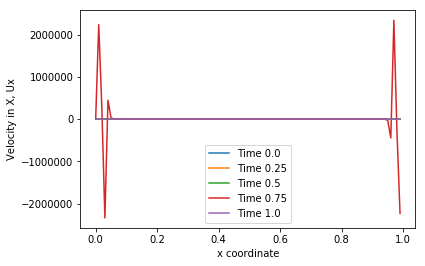

In [8]:
import matplotlib.pyplot as plt

for tindex, time in enumerate(times):
    Ux = result[tindex, :N]
    P = result[tindex, N:]
    plt.plot(x, Ux, label="Time {}".format(time))
plt.legend()
plt.xlabel("x coordinate")
plt.ylabel("Velocity in X, Ux")
plt.show()